<a href="https://colab.research.google.com/github/Muneeb2k1/DEP/blob/main/Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [57]:
df = pd.read_csv('CloudWatch_Traffic_Web_Attack.csv')
print(df.head())

   bytes_in  bytes_out         creation_time              end_time  \
0      5602      12990  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   
1     30912      18186  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   
2     28506      13468  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   
3     30546      14278  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   
4      6526      13892  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   

            src_ip src_ip_country_code protocol  response.code  dst_port  \
0   147.161.161.82                  AE    HTTPS            200       443   
1     165.225.33.6                  US    HTTPS            200       443   
2  165.225.212.255                  CA    HTTPS            200       443   
3   136.226.64.114                  US    HTTPS            200       443   
4   165.225.240.79                  NL    HTTPS            200       443   

         dst_ip              rule_names                      observation_name  \
0  10.138.69.97  Suspicious Web Traffic  

In [58]:
df['creation_time'] = pd.to_datetime(df['creation_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

df.fillna(0, inplace=True)

print(df.isnull().sum())

bytes_in               0
bytes_out              0
creation_time          0
end_time               0
src_ip                 0
src_ip_country_code    0
protocol               0
response.code          0
dst_port               0
dst_ip                 0
rule_names             0
observation_name       0
source.meta            0
source.name            0
time                   0
detection_types        0
dtype: int64


In [59]:
df['duration'] = (df['end_time'] - df['creation_time']).dt.total_seconds()

label_encoders = {}
categorical_columns = ['protocol', 'detection_types']

for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

print(df.head())

   bytes_in  bytes_out             creation_time                  end_time  \
0      5602      12990 2024-04-25 23:00:00+00:00 2024-04-25 23:10:00+00:00   
1     30912      18186 2024-04-25 23:00:00+00:00 2024-04-25 23:10:00+00:00   
2     28506      13468 2024-04-25 23:00:00+00:00 2024-04-25 23:10:00+00:00   
3     30546      14278 2024-04-25 23:00:00+00:00 2024-04-25 23:10:00+00:00   
4      6526      13892 2024-04-25 23:00:00+00:00 2024-04-25 23:10:00+00:00   

            src_ip src_ip_country_code  protocol  response.code  dst_port  \
0   147.161.161.82                  AE         0            200       443   
1     165.225.33.6                  US         0            200       443   
2  165.225.212.255                  CA         0            200       443   
3   136.226.64.114                  US         0            200       443   
4   165.225.240.79                  NL         0            200       443   

         dst_ip              rule_names                      observa

In [60]:
le = LabelEncoder()

df['src_ip_country_code_encoded'] = le.fit_transform(df['src_ip_country_code'])

print(dict(zip(le.classes_, le.transform(le.classes_))))

{'AE': 0, 'AT': 1, 'CA': 2, 'DE': 3, 'IL': 4, 'NL': 5, 'US': 6}


In [61]:
features = ['bytes_in', 'bytes_out', 'duration', 'src_ip_country_code_encoded']

X = df[features]

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

print(pd.DataFrame(X_scaled, columns=features).describe())

           bytes_in     bytes_out  duration  src_ip_country_code_encoded
count  2.820000e+02  2.820000e+02     282.0                 2.820000e+02
mean  -1.259828e-17 -1.259828e-17       0.0                -5.039310e-17
std    1.001778e+00  1.001778e+00       0.0                 1.001778e+00
min   -2.895618e-01 -3.320960e-01       0.0                -1.829139e+00
25%   -2.882722e-01 -2.884847e-01       0.0                -8.676903e-01
50%   -2.863889e-01 -2.780417e-01       0.0                 9.375828e-02
75%   -2.821274e-01 -2.289996e-01       0.0                 1.055207e+00
max    5.796403e+00  5.802781e+00       0.0                 1.055207e+00


In [62]:
iso_forest = IsolationForest(contamination=0.05, random_state=42)

iso_forest.fit(X_scaled)

df['anomaly'] = iso_forest.predict(X_scaled)

anomalies = df[df['anomaly'] == -1]

print(anomalies.head())

     bytes_in  bytes_out             creation_time                  end_time  \
36    4190330     283456 2024-04-25 23:30:00+00:00 2024-04-25 23:40:00+00:00   
116   4827283     306181 2024-04-26 01:00:00+00:00 2024-04-26 01:10:00+00:00   
153   4869181     301752 2024-04-26 01:40:00+00:00 2024-04-26 01:50:00+00:00   
169  18201558    1170896 2024-04-26 08:00:00+00:00 2024-04-26 08:10:00+00:00   
176  18273120    1145109 2024-04-26 08:10:00+00:00 2024-04-26 08:20:00+00:00   

            src_ip src_ip_country_code  protocol  response.code  dst_port  \
36   155.91.45.242                  US         0            200       443   
116  155.91.45.242                  US         0            200       443   
153  155.91.45.242                  US         0            200       443   
169  155.91.45.242                  US         0            200       443   
176  155.91.45.242                  US         0            200       443   

           dst_ip              rule_names  \
36   10.138

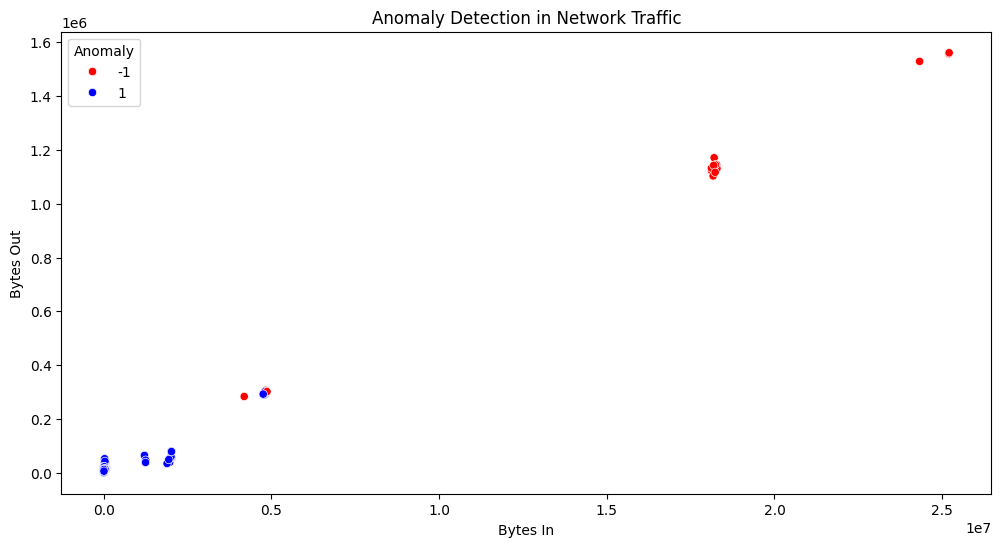

In [63]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['bytes_in'], y=df['bytes_out'], hue=df['anomaly'], palette={1: 'blue', -1: 'red'})
plt.title('Anomaly Detection in Network Traffic')
plt.xlabel('Bytes In')
plt.ylabel('Bytes Out')
plt.legend(title='Anomaly')
plt.show()